In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7289277657130074747
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4177330176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16654422508284937245
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
from sklearn.metrics import precision_recall_curve
import pandas as pd
from serialize import NumpyEncoder,json_numpy_obj_hook
import json
import orientation_converters as conv
from tqdm import tqdm
import math

In [3]:
with open("preds/alpha_normed.json","r+") as fp:
    alpha_preds = json.load(fp,object_hook=json_numpy_obj_hook)

Logistic: f1=0.841 auc=0.898


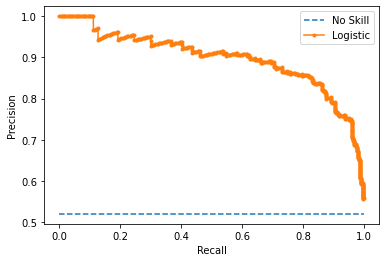

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [5]:
model.predict_proba(testX)[3]

array([0.84762581, 0.15237419])

In [21]:
lr_probs[0:10] 


array([0.99597268, 0.99799484, 0.00529883, 0.15237419, 0.99833335,
       0.50006145, 0.01976314, 0.02346338, 0.9820007 , 0.70646518])

In [19]:
testy

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [17]:
lr_precision

array([0.55793991, 0.55698925, 0.55818966, 0.55939525, 0.56060606,
       0.56182213, 0.56304348, 0.56427015, 0.56550218, 0.56673961,
       0.56798246, 0.56923077, 0.57048458, 0.57174393, 0.57300885,
       0.57427938, 0.57555556, 0.57683742, 0.578125  , 0.57941834,
       0.58071749, 0.58202247, 0.58333333, 0.58465011, 0.58597285,
       0.58730159, 0.58863636, 0.58997722, 0.5913242 , 0.59267735,
       0.5940367 , 0.59310345, 0.59447005, 0.59584296, 0.59722222,
       0.59860789, 0.6       , 0.6013986 , 0.60280374, 0.60421546,
       0.6056338 , 0.60705882, 0.60613208, 0.60756501, 0.60900474,
       0.61045131, 0.61190476, 0.61336516, 0.61483254, 0.61630695,
       0.61778846, 0.61927711, 0.62077295, 0.62227603, 0.62378641,
       0.62530414, 0.62682927, 0.62836186, 0.62990196, 0.63144963,
       0.63300493, 0.6345679 , 0.63613861, 0.63771712, 0.63930348,
       0.64089776, 0.6425    , 0.64411028, 0.64572864, 0.64735516,
       0.6489899 , 0.65063291, 0.64974619, 0.65139949, 0.65306